# CÓDIGO PARA LA CREACIÓN DE GRÁFICOS DE MAPA

## Librerias usadas

In [6]:
from os        import makedirs              # Para crear las carpetas donde se guardan los datos
from pandas    import DataFrame, concat     # Para crear y manipular una estructura de datos
from geopandas import read_file, datasets   # Para trabajar datos geograficos

from matplotlib.pyplot import subplots, cm, show    # Para crear la figura y mostrarla
from matplotlib.colors import TwoSlopeNorm          # Para establecer limites en la rampa de colores

from warnings import simplefilter   # Para suprimir los FutureWarnings (por los datasets)

## Definición de la función

In [7]:
# Para suprimir una advertencia de que en futuras versiones de la libreria geopandas esta dejará
# de almacenar datasets como el de naturalearth que es el que contine los shapes que se usan en
# esta función, cuando eso ocurra habrá que buscar otra fuente en linea de datasets o descargar
# los shapesfiles que se deseen usar y cargarlos con read_file
simplefilter(action='ignore', category=FutureWarning)

def create_Figure(
        data:DataFrame,               # Datos con información de los paises y valores asociados
        cmap = 'Greens',    #
        title = 'Mapa',     #
        mid_threshold = 4   #
    ):

    # Cargamos el geoDataFrame con informacion de los paises
    world = read_file(datasets.get_path('naturalearth_lowres'))

    # Agregamos al geoDataFrame la información de los paises que pasamos de parametro a la función
    world = world.merge(data, how="left", left_on="name", right_on="Country")

    # Separamos los paises de los que no pasamos datos
    missing_countries = data[~data['Country'].isin(world['name'])]

    # Creamos una figura y un eje
    fig, ax = subplots(1, 1, figsize=(12, 15), dpi = 1200)

    ax.set_facecolor('azure') # para el fondo de la figura
    
    # Se crean una rampa de valores, asociada al minimo y maximo de los datos y al punto medio que
    # se le pasa a esta funcion (esto es para tener control sobre la coloración que se le asigna)
    norm = TwoSlopeNorm(
        vmin    = world['Value'].min(), #
        vcenter = mid_threshold,        #
        vmax    = world['Value'].max()  #
    )

    # Se dibujan los paises con los colores de la rampa de colores que se le pasa a la funcion y con
    # la intensidad definida según el punto medio que se le pasa a la función
    world.plot(
        column       = 'Value', # Columna de los datos según la cual se colorea
        ax           = ax,      # Eje en el cual se dibuja la información
        cmap         = cmap,    # Rampa de colores a usar
        norm         = norm,    # Rampa de valores creada anteriormente
        edgecolor    = 'k',     # Color de los bordes
        linewidth    = 0.2,     # Grosor de los bordes
        missing_kwds = {'color': 'lightgrey'}, # Color por defecto, para los paises sin datos
        legend       = False    # Sin legenda (la manejaremos por separado)
    )
    
    # Redefinimos la rampa de colores de la legenda usando la rampa de valores creada
    sm = cm.ScalarMappable(cmap = cmap, norm = norm)

    # Creamos la  color bar y la dibujamos en la figura
    cbar = fig.colorbar(sm, ax=ax, shrink=0.28, norm = norm)

    # Definimos los valores que se mostrarán en la barra de colores
    cbar.set_ticks([
        world['Value'].min(),
        (mid_threshold-world['Value'].min())/2+world['Value'].min(), 
        mid_threshold, 
        (world['Value'].max()-mid_threshold)/2+mid_threshold, 
        world['Value'].max()
    ])

    # Modificamos las etiquetas que se muestran en la barra de color (en este caso para que
    # aparezcan los valores como enteros)
    cbar.set_ticklabels([
        f'{int(world["Value"].min())}', 
        f'{int((mid_threshold-world["Value"].min())/2+world["Value"].min())}', 
        f'{int(mid_threshold)}', 
        f'{int((world["Value"].max()-mid_threshold)/2+mid_threshold)}', 
        f'{int(world["Value"].max())}'
    ])

    # Eliminamos la linea del contorno de la barra de color
    cbar.outline.set_visible(False)

    # Eliminamos las lineas de contorno del eje sobre el que se esta dibujando
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Eliminamos las marcas de los ejes vertical y horizontal
    ax.set_xticks([])
    ax.set_yticks([])

    # Dibujamos el titulo
    ax.set_title(title)

    # Se muestra como texto la información de los paises de los que no se tiene información de forma
    # asociada
    missing_text = 'OTROS: \n'+'\n'.join(f"{row['Country']}: {row['Value']}" for _, row in missing_countries.iterrows())
    ax.text(0.05, 0.5, missing_text, transform=ax.transAxes, fontsize=6, va='center', ha='left')

    # Se crea una carpeta para las figuras y se guardan
    makedirs('Figuras', exist_ok = True)
    fig.savefig(f'Figuras/{title}.png', bbox_inches='tight', pad_inches=0.15, dpi = 1200)
    show()

## Ejemplo de definición de los datos

In [8]:
data_from_scopus_1962_2024 = DataFrame({
    'Country' : ["United States of America","China","Australia","United Kingdom","Japan","Italy","France","Spain","Brazil","Portugal","South Korea","Germany","Canada","Netherlands","Israel","Indonesia","Malaysia","India","Taiwan","Belgium","Sweden","Denmark","Mexico","Greece","Turkey","Norway","Russia","New Zealand","Singapore","Chile","Iran","Thailand","United Arab Emirates","Ireland","Saudi Arabia","South Africa","Argentina","Finland","Philippines","Egypt","Cyprus","Croatia","Guam","Panama","Poland","Qatar","Senegal","Colombia","Jamaica","Kenya","Cuba","Kuwait","Puerto Rico","Côte d'Ivoire","Honduras","Jordan","Madagascar","Malta","Mauritius","Oman","Pakistan","Palau","Slovenia","Tanzania","Ukraine","Albania","Algeria","Austria","Brunei","Costa Rica","Curaçao","Grenada","Guadeloupe","Iceland","Latvia","Lebanon","Lithuania","Maldives","Moldova","Montserrat","Morocco","Northern Mariana Islands","Palestine","Papua New Guinea","Peru","Romania","Seychelles","Solomon Is.","Sri Lanka","Switzerland","Tunisia","Turks and Caicos Islands","Uganda","Venezuela","Vietnam","French Polynesia","Undefined"],
    'Value'   : [765,392,213,181,133,105,107,90,83,79,78,74,67,62,59,49,45,41,41,31,30,25,22,19,19,17,18,16,13,12,12,12,12,11,11,11,8,8,8,7,6,5,5,5,5,5,5,4,4,4,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,245]
})

## Ejemplo de uso de la función

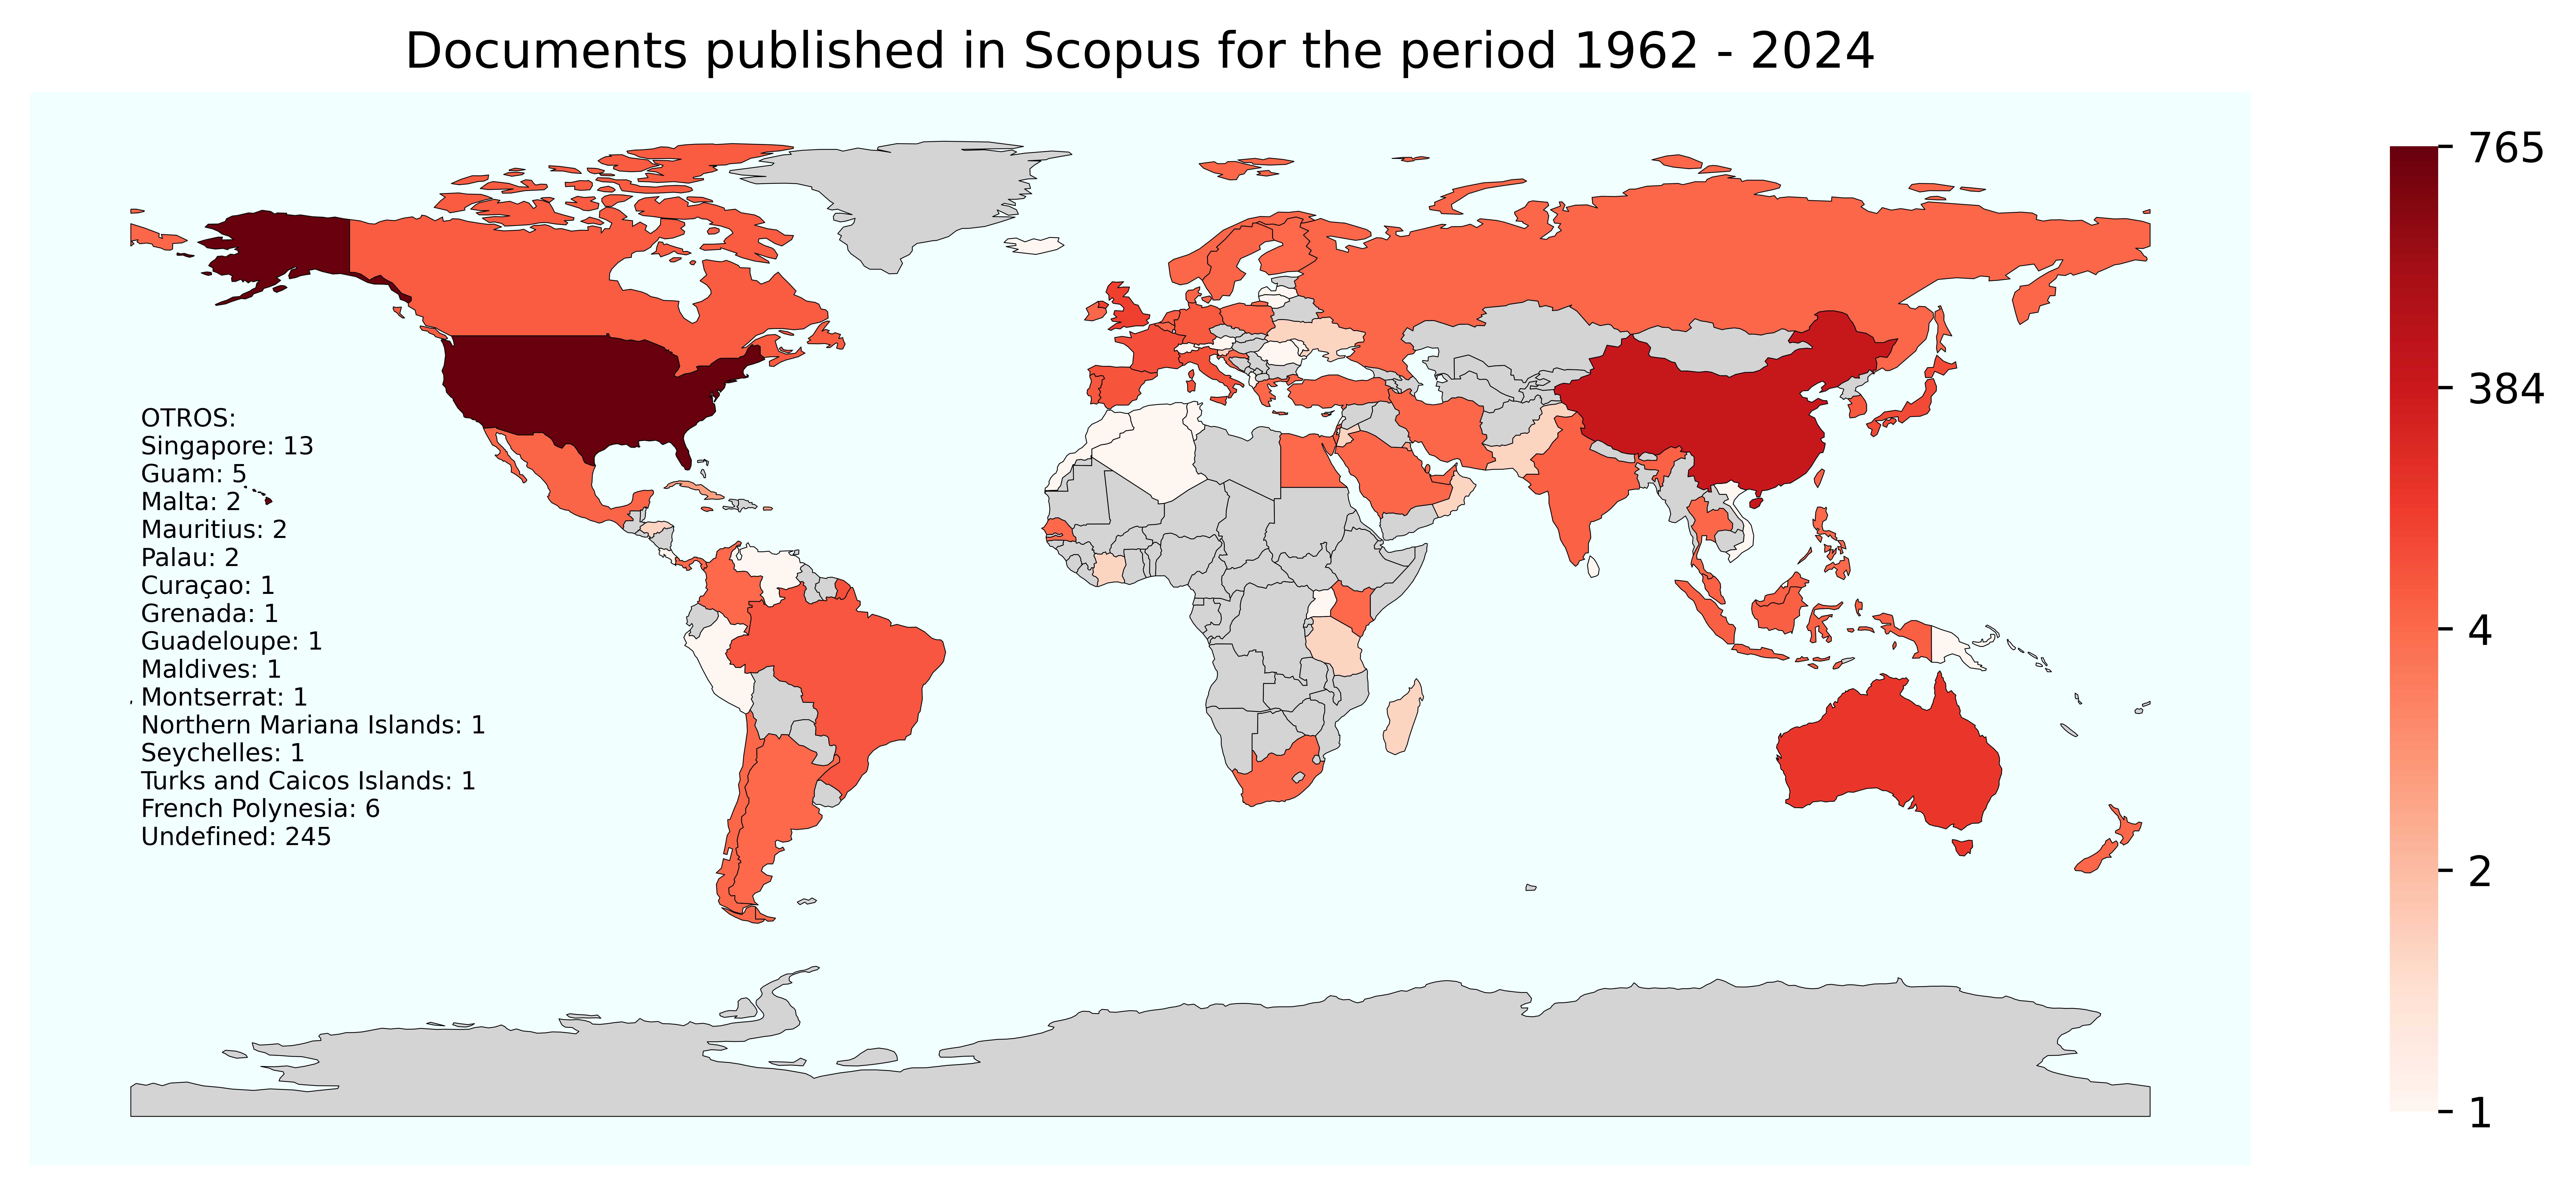

In [9]:
create_Figure(data_from_scopus_1962_2024,   'Reds', 'Documents published in Scopus for the period 1962 - 2024')

### (Opcional) Ejemplo de como exportar los datos en una tabla de excel

In [10]:
# Se combinan todos los datos presentados
combined_data = concat([
    data_from_scopus_1962_2024.set_index('Country').rename(columns={'Value': 'Scopus 1962-2024'})
], axis=1)

# Se procesan los datos
combined_data.index.name = None           # Para que el indice no salga con titulo
combined_data = combined_data.fillna(0)   # Para que donde no hay datos se rellene con 0
combined_data = combined_data.astype(int) # Para que todos los valores se interpreten como enteros

# Se exportan los datos en la ruta que se especifique
combined_data.to_excel('Tablas/Datos geograficos.xlsx')